In [8]:
import datetime
import numpy
import os
from matplotlib import pyplot as plt
import matplotlib

In [9]:
#file paths
s_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_stocks_5years.txt')
c_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_profiles_5years_outside.txt')

In [10]:
sample_size = 60
start_year = 2012
stocks_diff = []
commits_diff = []
stocks_raw = []
commits_raw = []
months = []
with open(s_path) as s:
  stocks_raw = s.readlines()
with open(c_path) as c:
  commits_raw = c.readlines()

In [11]:
#stocks
i = 0
while i < len(stocks_raw):
  line = stocks_raw[i].split("\t")
  start_month_string = line[0][0:7]
  start_month_price = float(line[1])
  found_pair = False
  while(found_pair == False):
    i+=1
    line_end = stocks_raw[i-1].split("\t")
    end_month_price = float(line_end[1])
    if(i >= len(stocks_raw)):
        stocks_diff.append(end_month_price-start_month_price)
        break
    line_end = stocks_raw[i].split("\t")
    end_month_string = line_end[0][0:7]
    if(start_month_string != end_month_string):
        stocks_diff.append(end_month_price-start_month_price)
        found_pair = True
stocks_diff.pop(0)

2.9810000000000016

In [12]:
#commits
for i in range (1, len(commits_raw)):
  line = commits_raw[i].split("\t")
  line_prev = commits_raw[i-1].split("\t")
  month_string = line[0]
  commits = float(line[1])
  commits_prev = float(line_prev[1])
  months.append(month_string)
  commits_diff.append(commits-commits_prev)

In [13]:
#calculating correlation coefficients
coeff_list = []
size = len(commits_diff)
for offset in range (0, 10):
    rel_matrix = numpy.corrcoef(commits_diff[offset:size],stocks_diff[0:size-offset])
    coeff_list.append(rel_matrix[0,1])

No handles with labels found to put in legend.


offset 0: -0.05899163638601816
offset 1: 0.2086642532244677
offset 2: -0.03719077341561227
offset 3: -0.27278404335433637
offset 4: -0.047873174522252246
offset 5: -0.07445262402998895
offset 6: -0.02399580634308272
offset 7: 0.20378767263516162
offset 8: 0.10268183629667901
offset 9: -0.37924292420628075


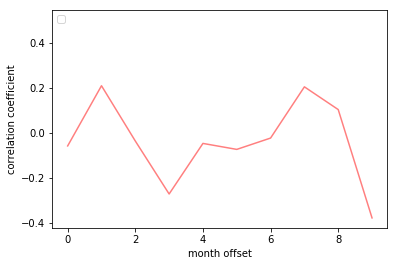

In [14]:
#graphing
offset_list = [0,1,2,3,4,5,6,7,8,9]
#plt.plot(day_list, stocks_diff, 10, c="red", alpha=0.5)
#plt.xlabel("Day of the Year")
#plt.ylabel("Change in stocks")
plt.plot(offset_list, coeff_list, 0.5, c="red", alpha=0.5)
plt.xlabel("month offset")
plt.ylabel("correlation coefficient")
plt.legend(loc=2)
for i in coeff_list:
    print("offset "+str(coeff_list.index(i))+": "+str(i))
plt.show()